In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import json
from tqdm import tqdm
import shutil
import seaborn as sns

In [2]:
# Fichier Json décrivant les diférentes images
with open('train_label.json') as file:
    jsonData = json.load(file)

In [3]:
print(jsonData['Data/train/5817/live/000012.jpg'][0:40])

[0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]


# On extrait juste les donées ayant le type de fraude qui nous interesse

In [4]:
cols = ['image_name','class', 'score', 'type_usurpation', 'condition_eclairage', 'environnement']
all_data = pd.DataFrame([], columns=cols)

df = pd.read_csv("Dataset_anti_spoofing/train/dataset_A.csv")
all_data = all_data.append(df, ignore_index=True)

df = pd.read_csv("Dataset_anti_spoofing/train/dataset_AAA.csv")
all_data = all_data.append(df, ignore_index=True)

df = pd.read_csv("Dataset_anti_spoofing/train/dataset_BZA.csv")
all_data = all_data.append(df, ignore_index=True)

df = pd.read_csv("Dataset_anti_spoofing/train/dataset_BZB.csv")
all_data = all_data.append(df, ignore_index=True)

df = pd.read_csv("Dataset_anti_spoofing/train/dataset_BZC.csv")
all_data = all_data.append(df, ignore_index=True)

print(all_data.shape)

all_data

(471331, 7)


,image_name,class,score,type_usurpation,condition_eclairage,environnement,Unnamed: 0
0,A__384_403642__0.jpg,live,0.999910,0,0,0,0.0
1,A__384_467432__1.jpg,live,0.999953,0,0,0,1.0
2,A__384_267048__2.jpg,live,0.999952,0,0,0,2.0
3,A__384_228365__3.jpg,live,0.998871,0,0,0,3.0
4,A__384_307577__4.jpg,live,0.997099,0,0,0,4.0
...,...,...,...,...,...,...,...
471326,BZC__3612_338746__97972.jpg,spoof,0.996374,4,2,1,97972.0
471327,BZC__3612_057451__97973.jpg,spoof,0.999775,4,2,1,97973.0
471328,BZC__3612_034224__97974.jpg,spoof,0.997443,4,2,1,97974.0
471329,BZC__3612_098532__97975.jpg,spoof,0.999816,4,2,1,97975.0


### Type d'usurpation

In [5]:
pret = all_data.type_usurpation.value_counts()
labels = {0: "Live", 1: "Photo", 2: "Poster", 3: "A4", 4: "Face Mask", 5: "Upper Body Mask", 6: "Region Mask", 7: "PC", 8: "Pad", 9: "Phone", 10: "3D Mask"}

<BarContainer object of 11 artists>

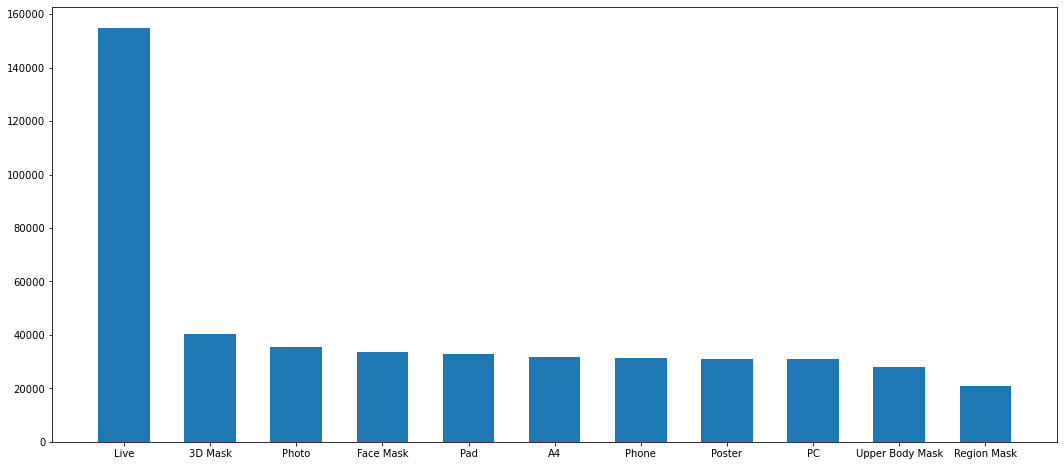

In [6]:
plt.figure(figsize=(18, 8))
plt.bar([labels[i] for i in pret.index], pret.values, linewidth = 2, width = 0.6)

In [7]:
# Nous gardons uniquement les images Live et Photo

all_data = all_data.loc[all_data['type_usurpation'].isin([0, 1]),:]
all_data

,image_name,class,score,type_usurpation,condition_eclairage,environnement,Unnamed: 0
0,A__384_403642__0.jpg,live,0.999910,0,0,0,0.0
1,A__384_467432__1.jpg,live,0.999953,0,0,0,1.0
2,A__384_267048__2.jpg,live,0.999952,0,0,0,2.0
3,A__384_228365__3.jpg,live,0.998871,0,0,0,3.0
4,A__384_307577__4.jpg,live,0.997099,0,0,0,4.0
...,...,...,...,...,...,...,...
471286,BZC__3612_351734__97932.jpg,live,0.999511,0,0,0,97932.0
471287,BZC__3612_095881__97933.jpg,live,0.998394,0,0,0,97933.0
471288,BZC__3612_487655__97934.jpg,live,0.999520,0,0,0,97934.0
471289,BZC__3612_151988__97935.jpg,live,0.999315,0,0,0,97935.0


### Condition d'éclairage

In [8]:
pret = all_data.condition_eclairage.value_counts()
labels = {0: "Live", 1: "Normal", 2: "Strong", 3: "Back", 4: "Dark"}

<BarContainer object of 5 artists>

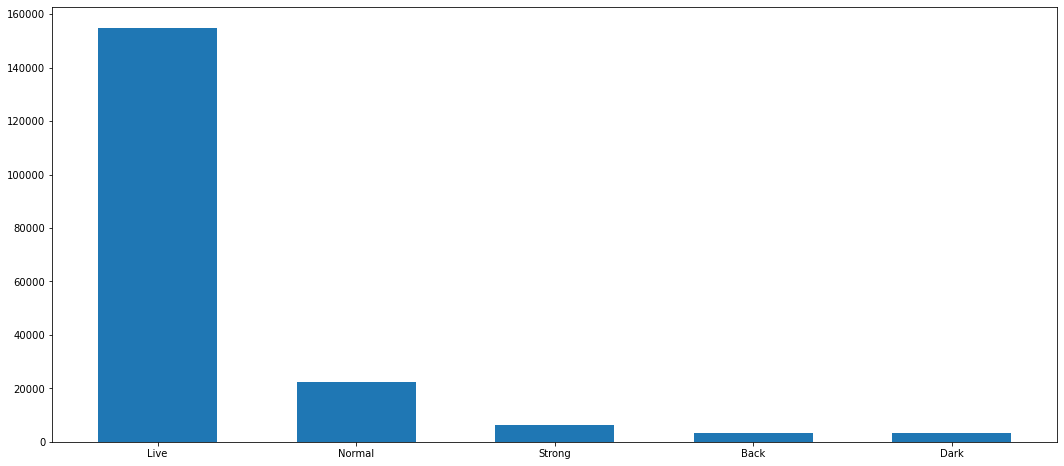

In [9]:
plt.figure(figsize=(18, 8))
plt.bar([labels[i] for i in pret.index], pret.values, linewidth = 2, width = 0.6)

In [10]:
# Nous gardons uniquement les images ayant les conditions d'éclairage Live

all_data = all_data.loc[all_data['condition_eclairage'].isin([0, 1]),:]
all_data

,image_name,class,score,type_usurpation,condition_eclairage,environnement,Unnamed: 0
0,A__384_403642__0.jpg,live,0.999910,0,0,0,0.0
1,A__384_467432__1.jpg,live,0.999953,0,0,0,1.0
2,A__384_267048__2.jpg,live,0.999952,0,0,0,2.0
3,A__384_228365__3.jpg,live,0.998871,0,0,0,3.0
4,A__384_307577__4.jpg,live,0.997099,0,0,0,4.0
...,...,...,...,...,...,...,...
471286,BZC__3612_351734__97932.jpg,live,0.999511,0,0,0,97932.0
471287,BZC__3612_095881__97933.jpg,live,0.998394,0,0,0,97933.0
471288,BZC__3612_487655__97934.jpg,live,0.999520,0,0,0,97934.0
471289,BZC__3612_151988__97935.jpg,live,0.999315,0,0,0,97935.0


# Nous allons garder au total 10 000 images pour notre travail. 6 000 pour l'entrainement, 2 000 pour la valisation et 2 000 pour les tests. Nous alons répartir de façon équitable les données Live et Photo.

In [11]:
cols = ['image_name','class', 'score', 'type_usurpation', 'condition_eclairage', 'environnement']
data_to_use = pd.DataFrame([], columns=cols)
data_validation = pd.DataFrame([], columns=cols)
data_test = pd.DataFrame([], columns=cols)
data_to_use

,image_name,class,score,type_usurpation,condition_eclairage,environnement


In [12]:
# Nous recupérons 5 000 images Live: 3 000 pour le train, 1000 pour la validation et 1000 pour le test

df = all_data.loc[(all_data['type_usurpation']==0) & (all_data['environnement'] == 0),:]
print(df.shape)
data_to_use = data_to_use.append(df.iloc[0:3000,:], ignore_index=True)
data_validation = data_validation.append(df.iloc[3000:4000,:], ignore_index=True)
data_test = data_test.append(df.iloc[4000:5000,:], ignore_index=True)
data_to_use

(154950, 7)


,image_name,class,score,type_usurpation,condition_eclairage,environnement,Unnamed: 0
0,A__384_403642__0.jpg,live,0.999910,0,0,0,0.0
1,A__384_467432__1.jpg,live,0.999953,0,0,0,1.0
2,A__384_267048__2.jpg,live,0.999952,0,0,0,2.0
3,A__384_228365__3.jpg,live,0.998871,0,0,0,3.0
4,A__384_307577__4.jpg,live,0.997099,0,0,0,4.0
...,...,...,...,...,...,...,...
2995,A__77_005486__9382.jpg,live,0.999225,0,0,0,9382.0
2996,A__77_104152__9383.jpg,live,0.999111,0,0,0,9383.0
2997,A__77_478296__9384.jpg,live,0.998899,0,0,0,9384.0
2998,A__77_295340__9385.jpg,live,0.999862,0,0,0,9385.0


In [13]:
data_validation

,image_name,class,score,type_usurpation,condition_eclairage,environnement,Unnamed: 0
0,A__77_195465__9387.jpg,live,0.999750,0,0,0,9387.0
1,A__77_418534__9388.jpg,live,0.997372,0,0,0,9388.0
2,A__77_308808__9389.jpg,live,0.999223,0,0,0,9389.0
3,A__77_108224__9390.jpg,live,0.999928,0,0,0,9390.0
4,A__77_163189__9391.jpg,live,0.999713,0,0,0,9391.0
...,...,...,...,...,...,...,...
995,A__420_116581__12649.jpg,live,0.999960,0,0,0,12649.0
996,A__420_349452__12650.jpg,live,0.998903,0,0,0,12650.0
997,A__420_143864__12651.jpg,live,0.999965,0,0,0,12651.0
998,A__420_173550__12652.jpg,live,0.977311,0,0,0,12652.0


In [14]:
data_test

,image_name,class,score,type_usurpation,condition_eclairage,environnement,Unnamed: 0
0,A__138_156416__12697.jpg,live,0.996403,0,0,0,12697.0
1,A__138_146436__12698.jpg,live,0.999718,0,0,0,12698.0
2,A__138_293933__12699.jpg,live,0.999431,0,0,0,12699.0
3,A__138_275686__12700.jpg,live,0.999972,0,0,0,12700.0
4,A__138_079262__12701.jpg,live,0.997731,0,0,0,12701.0
...,...,...,...,...,...,...,...
995,A__60_323015__15853.jpg,live,0.999600,0,0,0,15853.0
996,A__60_116336__15854.jpg,live,0.997545,0,0,0,15854.0
997,A__60_218253__15855.jpg,live,0.998729,0,0,0,15855.0
998,A__60_062291__15856.jpg,live,0.999614,0,0,0,15856.0


In [15]:
# Nous recupérons 5 000 images Photo: 3 000 pour le train, 1000 pour la validation et 1000 pour le test

df = all_data.loc[(all_data['type_usurpation']==1),:]
print(df.shape)
data_to_use = data_to_use.append(df.iloc[0:3000,:], ignore_index=True)
data_validation = data_validation.append(df.iloc[3000:4000,:], ignore_index=True)
data_test = data_test.append(df.iloc[4000:5000,:], ignore_index=True)
data_to_use

(22305, 7)


,image_name,class,score,type_usurpation,condition_eclairage,environnement,Unnamed: 0
0,A__384_403642__0.jpg,live,0.999910,0,0,0,0.0
1,A__384_467432__1.jpg,live,0.999953,0,0,0,1.0
2,A__384_267048__2.jpg,live,0.999952,0,0,0,2.0
3,A__384_228365__3.jpg,live,0.998871,0,0,0,3.0
4,A__384_307577__4.jpg,live,0.997099,0,0,0,4.0
...,...,...,...,...,...,...,...
5995,A__289_016009__5164.jpg,spoof,0.999801,1,1,1,5164.0
5996,A__289_021633__5165.jpg,spoof,0.999480,1,1,1,5165.0
5997,A__289_363814__5166.jpg,spoof,0.999939,1,1,1,5166.0
5998,A__289_167743__5167.jpg,spoof,0.999928,1,1,1,5167.0


In [16]:
data_to_use

,image_name,class,score,type_usurpation,condition_eclairage,environnement,Unnamed: 0
0,A__384_403642__0.jpg,live,0.999910,0,0,0,0.0
1,A__384_467432__1.jpg,live,0.999953,0,0,0,1.0
2,A__384_267048__2.jpg,live,0.999952,0,0,0,2.0
3,A__384_228365__3.jpg,live,0.998871,0,0,0,3.0
4,A__384_307577__4.jpg,live,0.997099,0,0,0,4.0
...,...,...,...,...,...,...,...
5995,A__289_016009__5164.jpg,spoof,0.999801,1,1,1,5164.0
5996,A__289_021633__5165.jpg,spoof,0.999480,1,1,1,5165.0
5997,A__289_363814__5166.jpg,spoof,0.999939,1,1,1,5166.0
5998,A__289_167743__5167.jpg,spoof,0.999928,1,1,1,5167.0


In [17]:
data_validation

,image_name,class,score,type_usurpation,condition_eclairage,environnement,Unnamed: 0
0,A__77_195465__9387.jpg,live,0.999750,0,0,0,9387.0
1,A__77_418534__9388.jpg,live,0.997372,0,0,0,9388.0
2,A__77_308808__9389.jpg,live,0.999223,0,0,0,9389.0
3,A__77_108224__9390.jpg,live,0.999928,0,0,0,9390.0
4,A__77_163189__9391.jpg,live,0.999713,0,0,0,9391.0
...,...,...,...,...,...,...,...
1995,A__417_408891__7079.jpg,spoof,0.999267,1,1,1,7079.0
1996,A__417_162940__7080.jpg,spoof,0.996411,1,1,1,7080.0
1997,A__417_326973__7081.jpg,spoof,0.999434,1,1,1,7081.0
1998,A__417_416933__7082.jpg,spoof,0.998048,1,1,1,7082.0


(10000, 8)


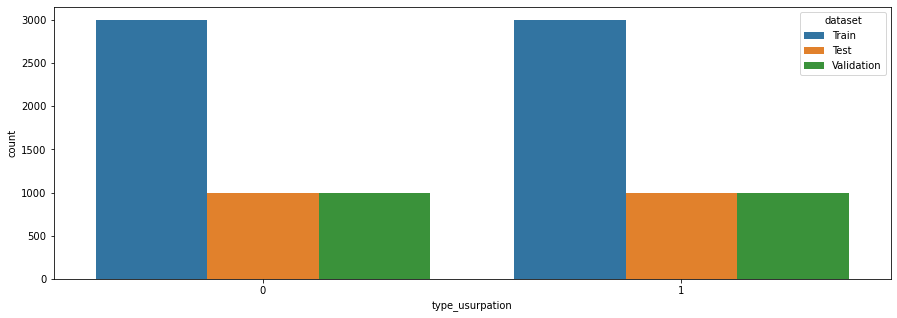

In [18]:
from sklearn.utils import shuffle

total = pd.DataFrame([], columns=cols)

data_to_use['dataset'] = 'Train'
total = total.append(data_to_use, ignore_index=True)

data_validation['dataset'] = 'Validation'
total = total.append(data_validation, ignore_index=True)

data_test['dataset'] = 'Test'
total = total.append(data_test, ignore_index=True)
total = shuffle(total)

print(total.shape)

plt.figure(figsize=(15,5))
sns.countplot(x="type_usurpation", hue="dataset", data=total)

# Création du dataset d'image avec le nouveau dataset

In [19]:
for image in data_to_use.values:
    # On copie l'image dans le repertoire approprié
    sortie = ''
    if image[1] == 'live':
        sortie = "Dataset_anti_spoofing/train/live_new/"
    else:
        sortie = "Dataset_anti_spoofing/train/spoof_new/"
    shutil.copy('Dataset_anti_spoofing/train/{}/{}'.format(image[1], image[0]), '{}{}'.format(sortie, image[0]))

In [34]:
for image in data_validation.values:
    # On copie l'image dans le repertoire approprié
    sortie = ''
    if image[1] == 'live':
        sortie = "Dataset_anti_spoofing/validation/live_new/"
    else:
        sortie = "Dataset_anti_spoofing/validation/spoof_new/"
    shutil.copy('Dataset_anti_spoofing/train/{}/{}'.format(image[1], image[0]), '{}{}'.format(sortie, image[0]))

In [35]:
for image in data_test.values:
    # On copie l'image dans le repertoire approprié
    sortie = ''
    if image[1] == 'live':
        sortie = "Dataset_anti_spoofing/test/live_new/"
    else:
        sortie = "Dataset_anti_spoofing/test/spoof_new/"
    shutil.copy('Dataset_anti_spoofing/train/{}/{}'.format(image[1], image[0]), '{}{}'.format(sortie, image[0]))

### Data visualisation

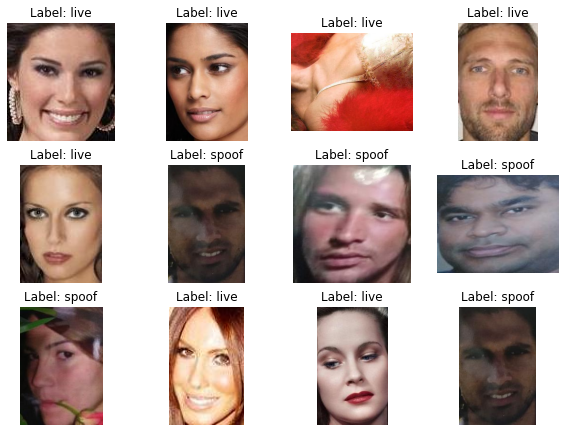

In [22]:
# Affichage de quelques images
from sklearn.utils import shuffle
import cv2 as cv

data_to_use = shuffle(data_to_use)

liste_image = []

for image in data_test.values:
    img = cv.imread('./Dataset_anti_spoofing/train/{}/{}'.format(image[1], image[0]))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    liste_image.append([img, image[1]])

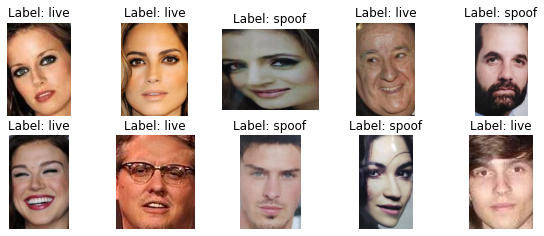

In [34]:
plt.figure(figsize=(10, 10))
for k, i in np.ndenumerate(np.random.randint(len(liste_image), size=10)):
    ax = plt.subplot(5, 5, k[0] + 1)
    plt.imshow(liste_image[i][0])
    plt.title('Label: {}'.format(liste_image[i][1]))
    plt.axis("off")